In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
ds_co = pd.read_csv('CSV/GaCo01_01.csv')
ds_pt = pd.read_csv('CSV/GaPt03_01.csv')


In [28]:
ds_co.shape

(12118, 16)

In [4]:
ds_co = ds_co.iloc[:, 1:-2]
ds_pt = ds_pt.iloc[:, 1:-2]

In [29]:
PolynomialFeatures?

In [5]:
poly = PolynomialFeatures(degree=2)
ds_co_poly = poly.fit_transform(ds_co)
ds_pt_poly = poly.fit_transform(ds_pt)

<IPython.core.display.Javascript object>


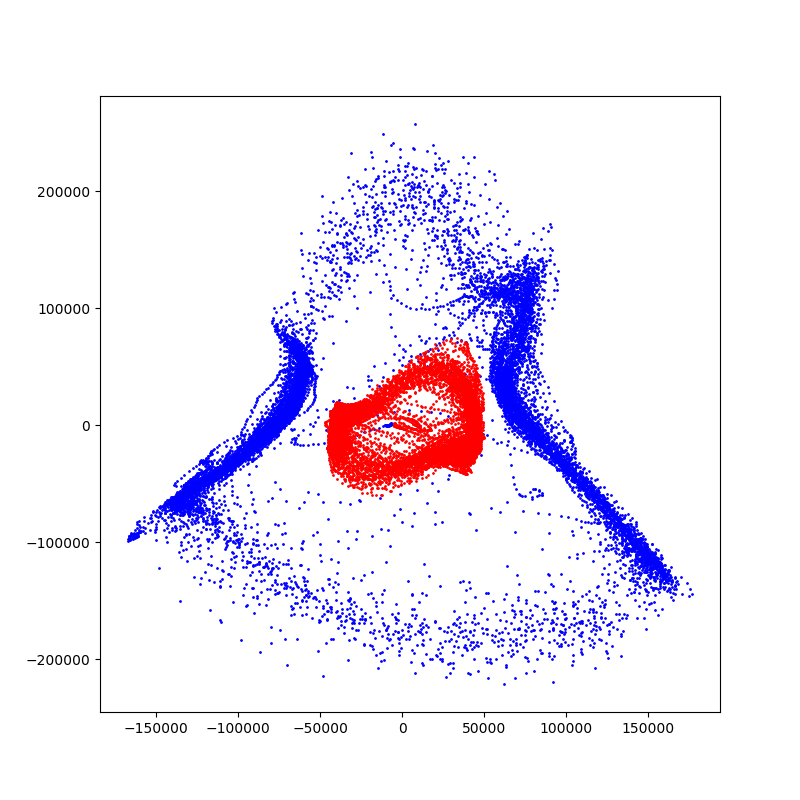

In [6]:
fig1, subaxes = plt.subplots(1, 1, figsize=(8,8))

pca1 = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca1.fit_transform(ds_co_poly)
ds_pt_poly_pca = pca1.fit_transform(ds_pt_poly)
# ds_co_poly_pca = pca.transform(ds_co_poly)
subaxes.scatter(ds_co_poly_pca[:, 0], ds_co_poly_pca[:, 1],  c='blue' ,s=1)
subaxes.scatter(ds_pt_poly_pca[:, 0], ds_pt_poly_pca[:, 1],  c='red' ,s=1)


In [30]:
ds_co_poly_pca.shape

(12118, 2)

In [22]:
df_co = pd.DataFrame(ds_co_poly_pca)
df_co

,0,1
0,-8966.318451,-250.547163
1,-8920.530940,-301.690508
2,-9081.681623,-516.375958
3,-8625.144089,-737.111157
4,-9176.574048,-354.442656
5,-10036.887825,269.924444
6,-8961.656862,-655.614024
7,-9651.788340,-465.423699
8,-9962.390029,133.471681
9,-9998.241266,72.109722


In [9]:
pd.DataFrame(pca1.components_)

,0,1,2,3,4,5,6,7,8,9,...,143,144,145,146,147,148,149,150,151,152
0,-2.646922e-20,-0.000567,-0.001567,-0.001455,-0.001068,-0.000466,-0.000889,-0.001576,-0.000433,0.000799,...,0.067457,0.048062,0.136350,0.014792,0.045507,0.099328,0.010308,0.285988,0.027886,-0.008317
1,4.149210e-17,0.000578,0.001009,0.001035,-0.000010,0.000070,-0.000819,-0.001072,-0.000931,-0.001249,...,0.044886,0.064097,0.143417,0.018206,0.120573,0.210052,0.036205,0.468954,0.066750,0.022927


In [10]:
pd.DataFrame(pca1.components_).apply((lambda x: x.max()), axis=1)

0    0.285988
1    0.468954
dtype: float64

In [11]:
pd.DataFrame(pca1.components_).apply((lambda x: x.argmax()), axis=1)

0    150
1    150
dtype: int64

In [12]:
pca1.explained_variance_

array([  1.21630665e+09,   5.09181851e+08])

<IPython.core.display.Javascript object>


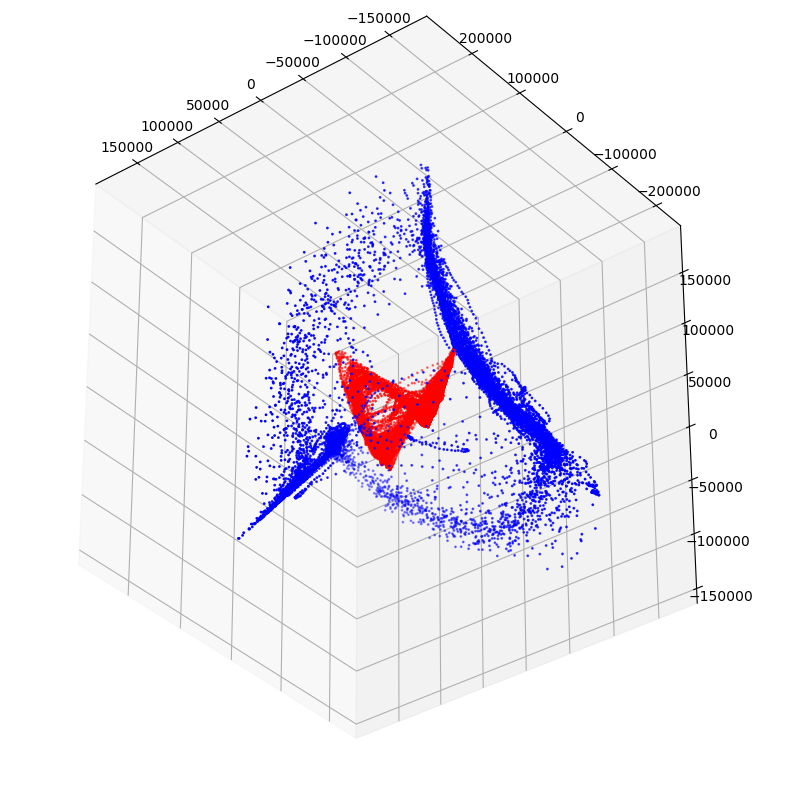

In [13]:
fig = plt.figure(figsize=(8,8))

subaxes1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components=3)
ds_co_poly_pca2 = pca.fit_transform(ds_co_poly)
ds_pt_poly_pca2 = pca.fit_transform(ds_pt_poly)

subaxes1.scatter(ds_co_poly_pca2[:, 0], ds_co_poly_pca2[:, 1], ds_co_poly_pca2[:, 2],  c='blue' ,s=1)
subaxes1.scatter(ds_pt_poly_pca2[:, 0], ds_pt_poly_pca2[:, 1], ds_pt_poly_pca2[:, 2],  c='red' ,s=1)



In [14]:
print(pca.explained_variance_ )

[  1.21630665e+09   5.09181851e+08   3.32138787e+08]


In [31]:
ds_co.to_csv('PCA/PCA_GaCo01_01.csv')
ds_pt.to_csv('PCA/PCA_GaPt03_01.csv')